
*Se desea identificar las caracteristicas que tendria un sobreviviente del titanic*

---

### Conexion Drive

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


### Librerias

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import os
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Para los graficos tengan las mismas dimensiones
%matplotlib inline
plt.style.use('ggplot')
#plt.rcParams['figure.figsize'] = (7, 4)

pd.options.display.max_columns = None
sns.set_style('whitegrid')
color = sns.color_palette()

## Rutas

In [ ]:
#Repositorios
path = '/gdrive/MyDrive/BQ - Data Science/BQ - Repositorios/Repositorio_Portafolio/'
filename = "Titanic.csv"
fullpath = os.path.join(path, filename)

# Lectura de datos

In [ ]:
df = pd.read_csv(fullpath)

In [ ]:
print(df.shape)
df.head(3)

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


# Data Wrangling

In [ ]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Revisamos duplicados

In [ ]:
df.duplicated().any()

False

In [ ]:
columnsNoAnalisis = ['PassengerId','Name','Ticket','Cabin']
target = ['Survived']
columnsString = ['Pclass','Sex','SibSp','Embarked']
columnsNumeric = [x for x in df.columns if x not in columnsString + columnsNoAnalisis + target]

In [ ]:
columnsNumeric

['Age', 'Parch', 'Fare']

In [ ]:
predictors = [var for var in df if var not in ['PassengerId','Survived']]
predictors

['Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

# **I. Analisis Exploratorio**

In [ ]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PassengerId,891.0,NaN,NaN,NaN,446.0,257.353842,1.0,223.5,446.0,668.5,891.0
Survived,891.0,NaN,NaN,NaN,0.383838,0.486592,0.0,0.0,0.0,1.0,1.0
Pclass,891.0,NaN,NaN,NaN,2.308642,0.836071,1.0,2.0,3.0,3.0,3.0
Name,891,891,"Braund, Mr. Owen Harris",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,891,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,714.0,NaN,NaN,NaN,29.699118,14.526497,0.42,20.125,28.0,38.0,80.0
SibSp,891.0,NaN,NaN,NaN,0.523008,1.102743,0.0,0.0,0.0,1.0,8.0
Parch,891.0,NaN,NaN,NaN,0.381594,0.806057,0.0,0.0,0.0,0.0,6.0
Ticket,891,681,347082,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,891.0,NaN,NaN,NaN,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292


## Revision Objetivo

Porcentaje de No Sobrevivientes : 0.62
Porcentaje de Sobrevivientes : 0.38


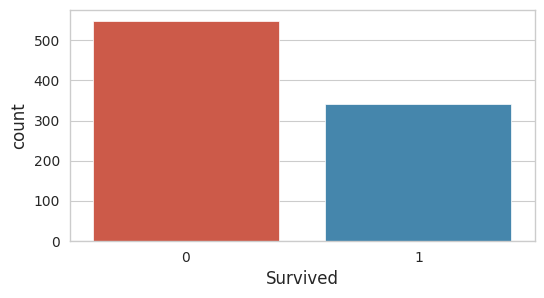

In [ ]:
plt.figure(figsize=(6,3))
sns.countplot(x='Survived', data=df);

print('Porcentaje de No Sobrevivientes : %.2f' % (df['Survived'].value_counts()[0] / len(df)))
print('Porcentaje de Sobrevivientes : %.2f' % (df['Survived'].value_counts()[1] / len(df)))

## Analisis Univariado

### Categoricas

Pclass
1    216
2    184
3    491
dtype: int64


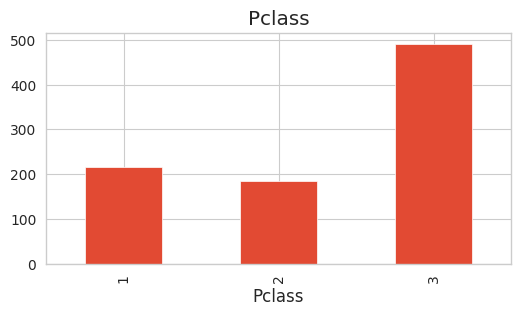

Sex
female    314
male      577
dtype: int64


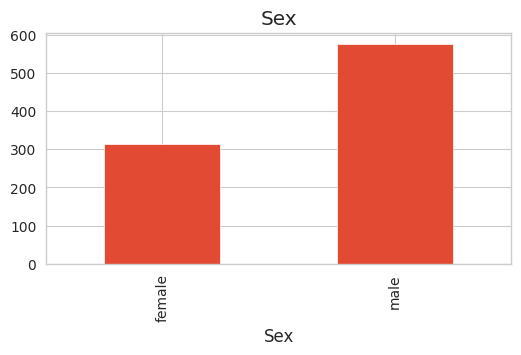

SibSp
0    608
1    209
2     28
3     16
4     18
5      5
8      7
dtype: int64


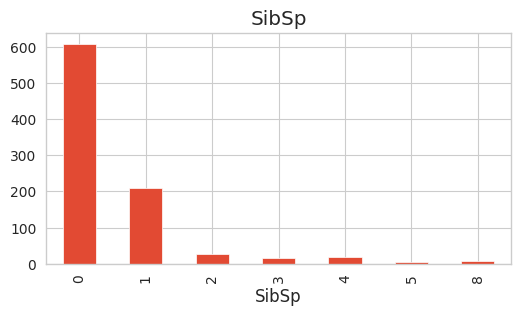

Embarked
C    168
Q     77
S    644
dtype: int64


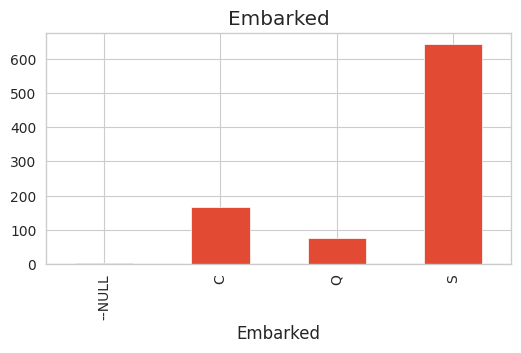

In [ ]:
for x in columnsString:
  plt.figure(figsize=(6,3))
  print(df.groupby(x).size())
  plt.title(x)
  df.fillna("--NULL").groupby(x)[x].count().plot(kind = "bar")
  plt.show()

### Numericas

In [ ]:
df[columnsNumeric].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [ ]:
df.groupby('Survived').median() # Mediana no se ve afectada con valores atípicos

,PassengerId,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,,
0,455.0,3.0,28.0,0.0,0.0,10.5
1,439.5,2.0,28.0,0.0,0.0,26.0


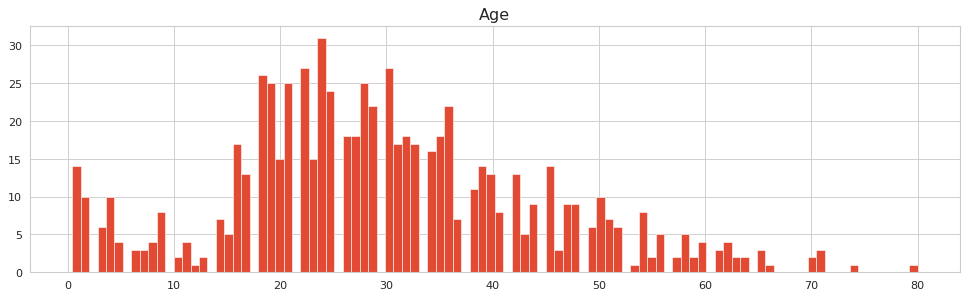

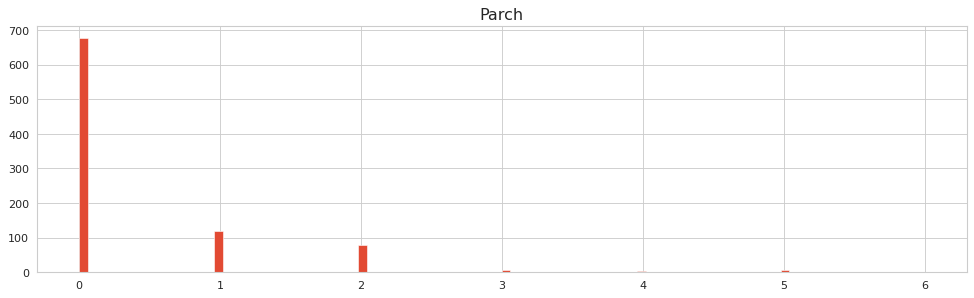

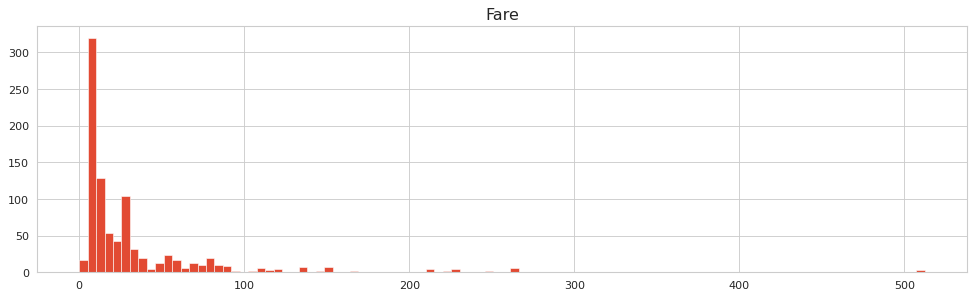

In [ ]:
for x in columnsNumeric:
  plt.figure(figsize=(15,4), dpi=80)
  plt.title(df[x].name)
  plt.hist(df[x],bins=100)
  plt.show()

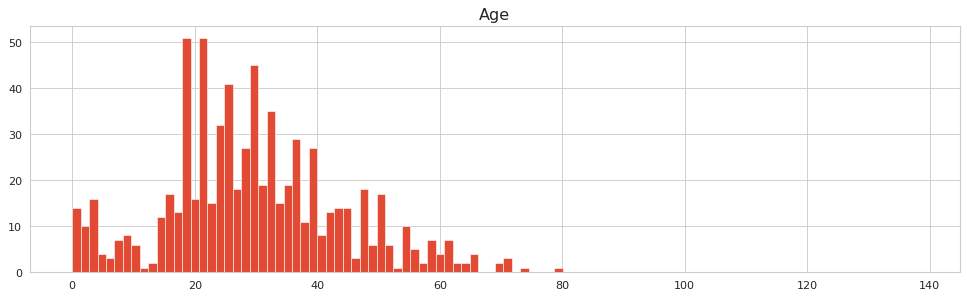

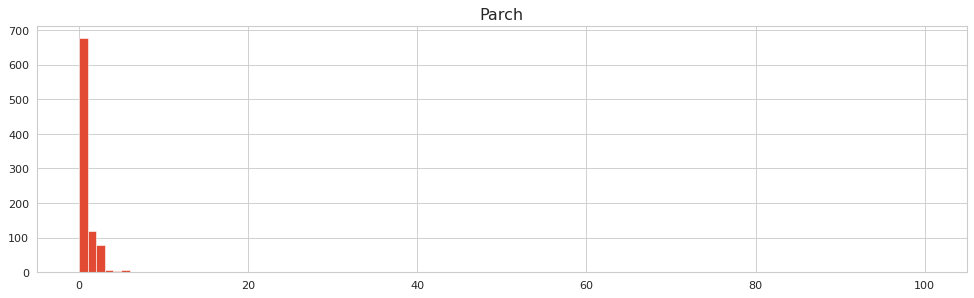

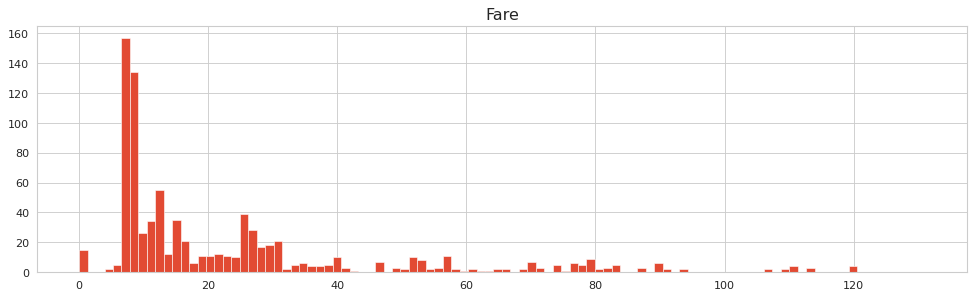

In [ ]:
# No consideramos las colas (outliers) para ver mejor la distribucion
for x in columnsNumeric:
  plt.figure(figsize=(15,4), dpi=80)
  Q03= int(df[x].quantile(0.75))+100
  plt.title(df[x].name)
  plt.hist(df[x],bins=100,range=(0,Q03))
  plt.show()

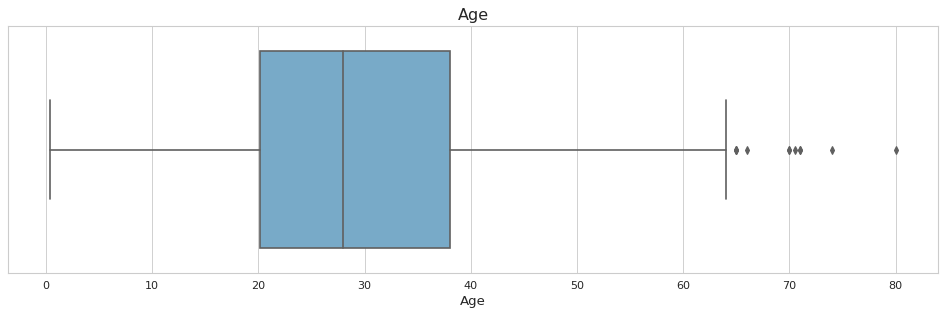

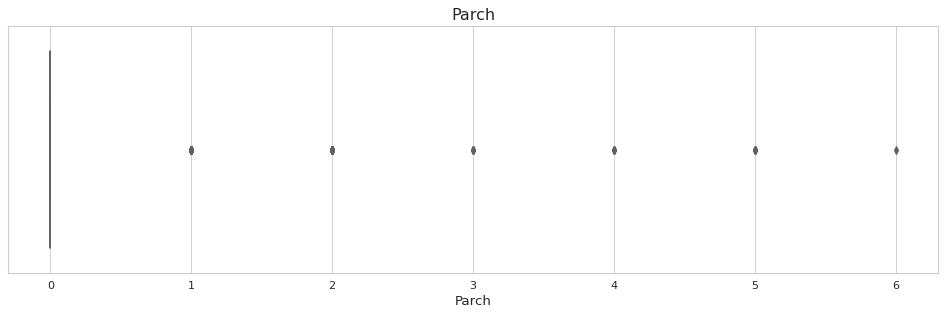

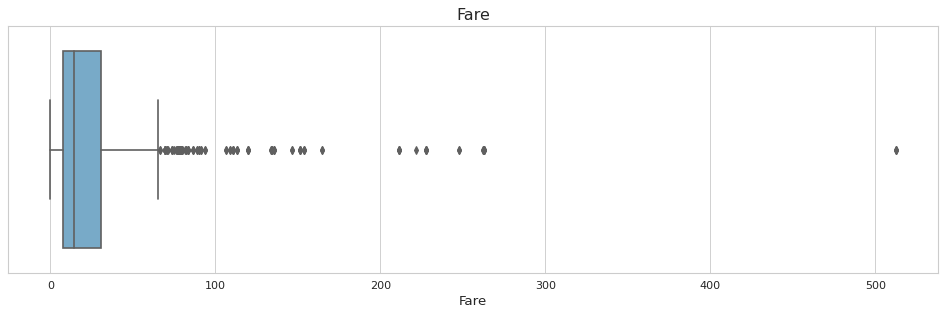

In [ ]:
# Grafico de Cajas para revision de atipicos
for x in columnsNumeric:
  plt.figure(figsize=(15,4), dpi=80)
  plt.title(df[x].name)
  sns.boxplot(x=df[x], palette="Blues")
  plt.show()

## Anlisis Bivariado

### Categoricas

In [ ]:
columnsString

['Pclass', 'Sex', 'SibSp', 'Embarked']

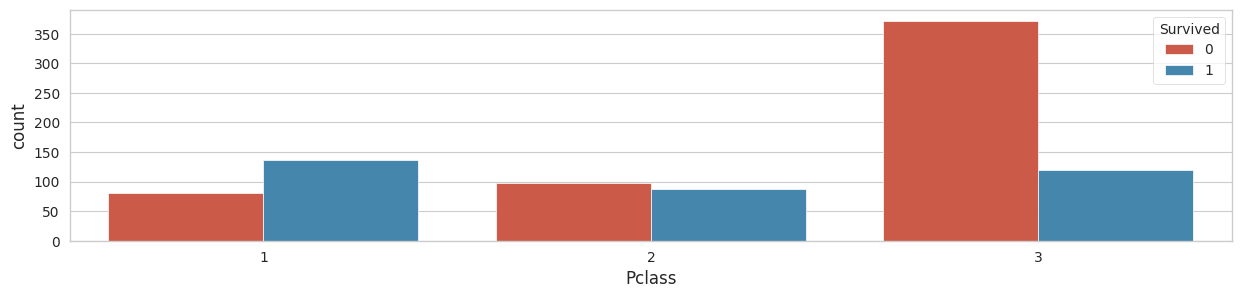

In [ ]:
# Pclass

plt.figure(figsize=(15,3))
sns.countplot(x='Pclass', hue='Survived', data=df);

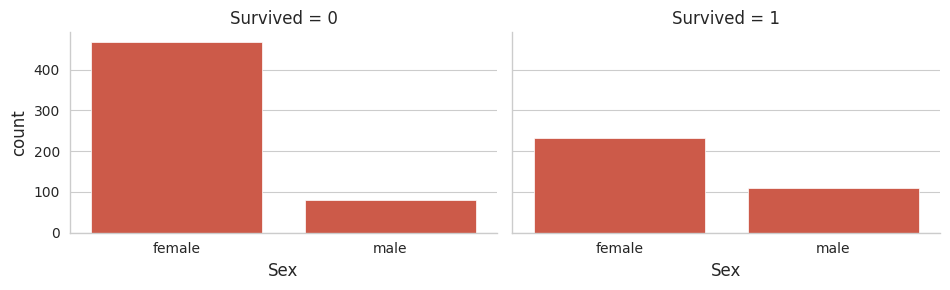

In [ ]:
# Sex

grid = sns.FacetGrid(df,col='Survived', aspect=1.6)
grid.map(sns.countplot, 'Sex');

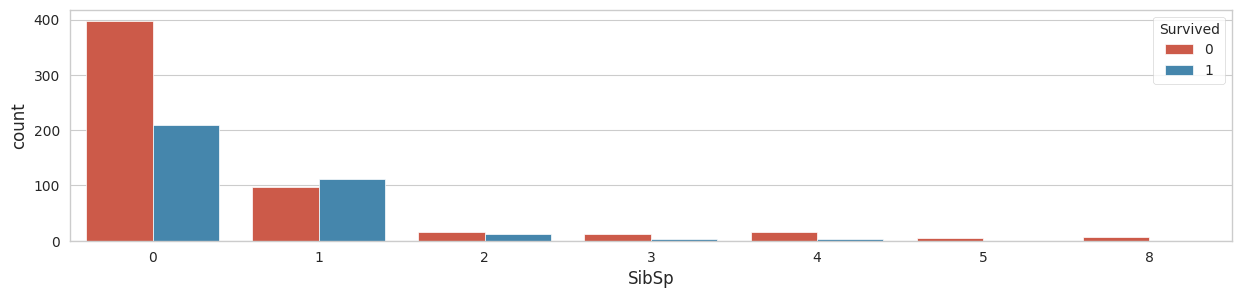

In [ ]:
# SibSp

plt.figure(figsize=(15,3))
sns.countplot(x='SibSp', hue='Survived', data=df);

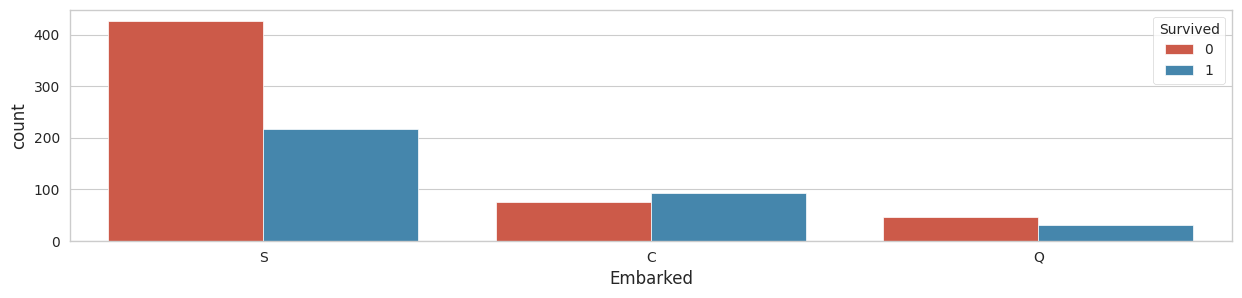

In [ ]:
# Embarked

plt.figure(figsize=(15,3))
sns.countplot(x='Embarked', hue='Survived', data=df);

### Numericas

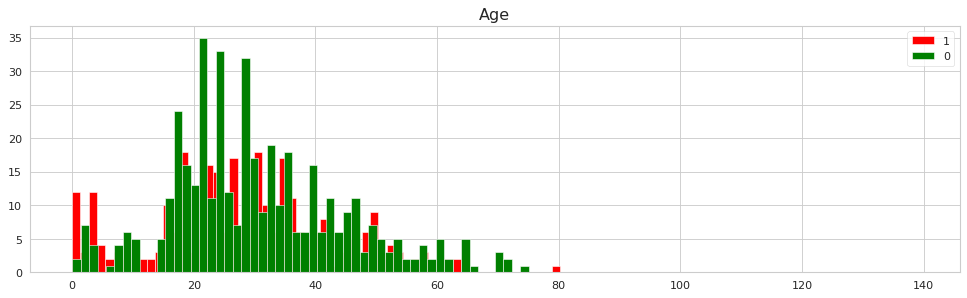

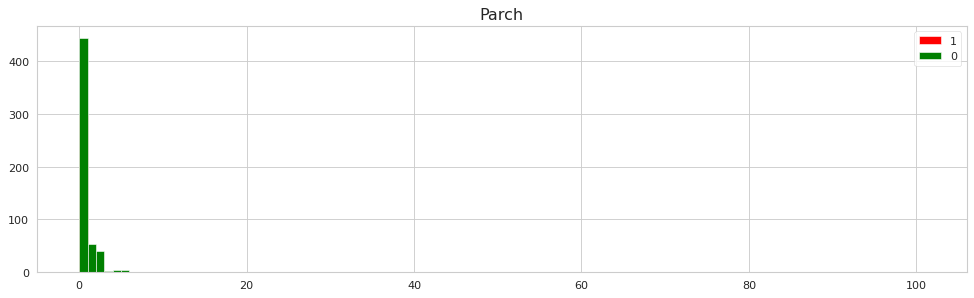

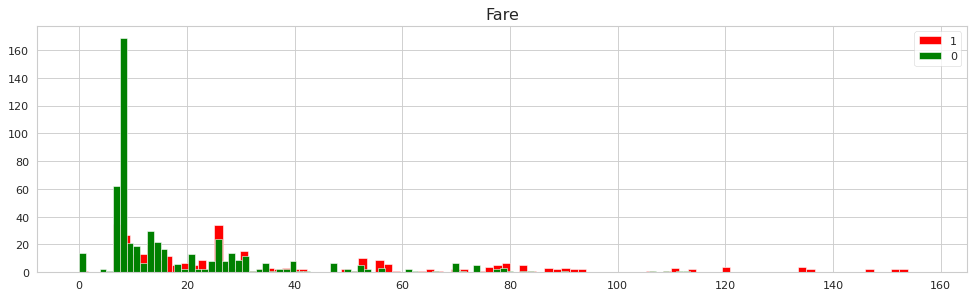

In [ ]:
# Analizando variables numericas con respecto al target
for x in columnsNumeric:
  plt.figure(figsize=(15,4), dpi=80)
  x1 = df.loc[df['Survived']==1,x]  #Serie
  x2 = df.loc[df['Survived']==0,x]  #serie

  Q03x1 = int(pd.DataFrame(x1)[x].quantile(0.75))+100  # Q3 de la serie
  Q03x2 = int(pd.DataFrame(x2)[x].quantile(0.75))+100  # Q3 de la serie

  #se muestran las densidades
  plt.title(df[x].name)
  plt.hist(x1,bins=100,color='r',range=(0,Q03x1),label=1)
  plt.hist(x2,bins=100,color='g',range=(0,Q03x2),label=0)
  plt.legend()
  plt.show()

In [ ]:
!pip install plotly

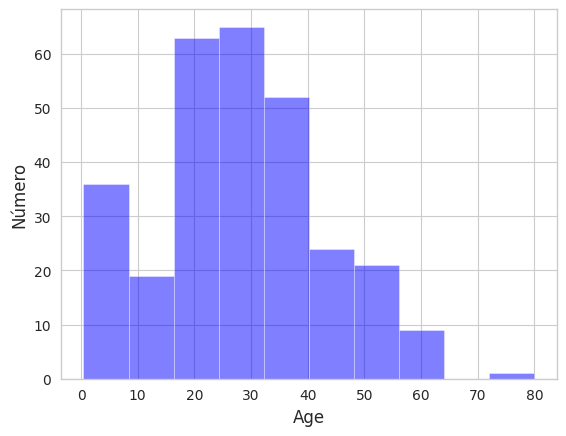

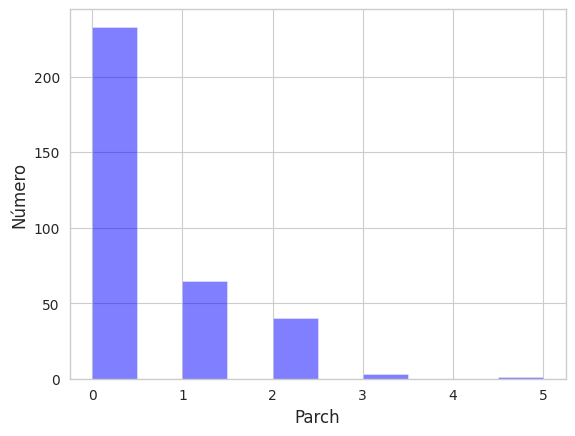

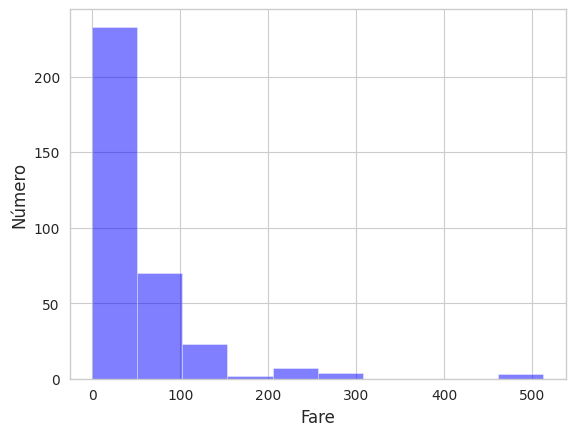

In [ ]:
num_bins = 10
data_0 = df[df.Survived == 1]

for i in columnsNumeric:
    n, bins, patches = plt.hist(data_0[i], num_bins, facecolor='blue', alpha=0.5)
    plt.xlabel(i)
    plt.ylabel('Número')
    plt.show()

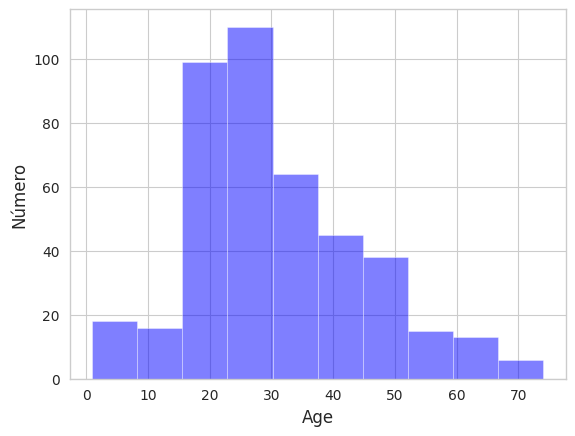

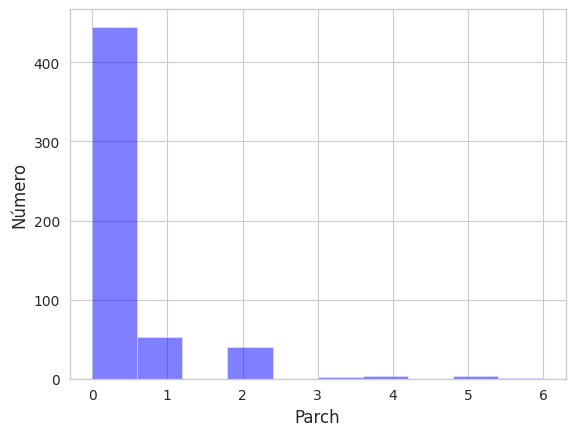

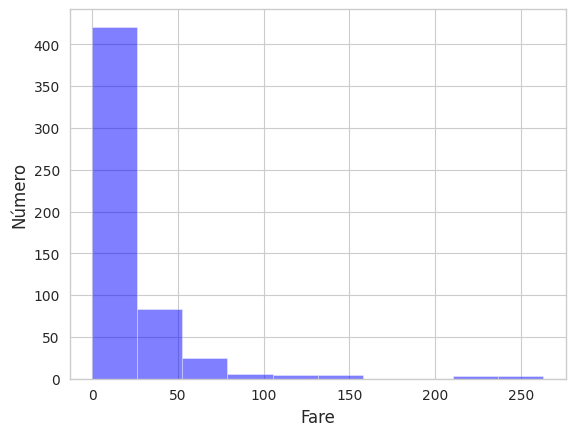

In [ ]:
num_bins = 10
data_0 = df[df.Survived == 0]

for i in columnsNumeric:
    n, bins, patches = plt.hist(data_0[i], num_bins, facecolor='blue', alpha=0.5)
    plt.xlabel(i)
    plt.ylabel('Número')
    plt.show()

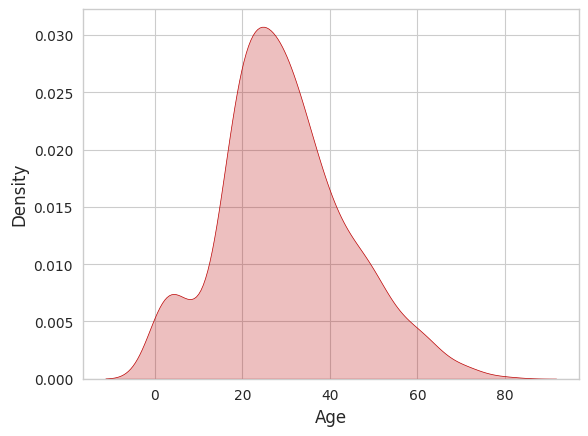

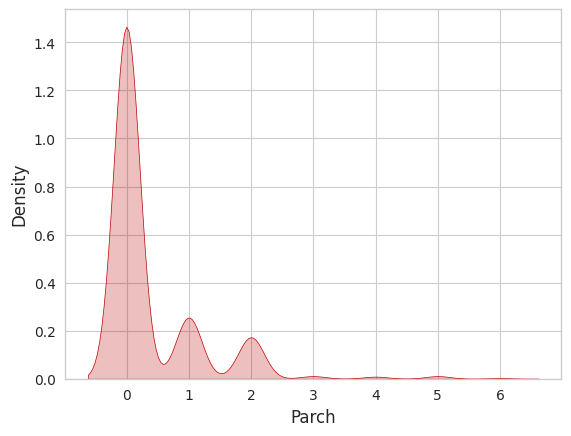

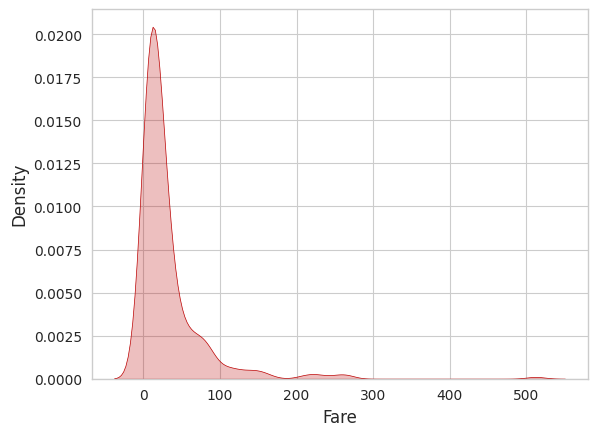

In [ ]:
data_0 = df
for i in columnsNumeric:
    sns.kdeplot(data_0[i],shade = True,vertical = False,kernel = 'gau',cumulative = False,color = "#BB0000")
    plt.show()

In [ ]:
from plotly.offline import download_plotlyjs, plot, iplot
from plotly.graph_objs import *

In [ ]:
columnsString

['Pclass', 'Sex', 'SibSp', 'Embarked']

In [ ]:
# gender de los que NO sobrevivieron
geom_we = Histogram(x = df.query('Survived == 0')['Sex'],
               marker = {'color': '#5555FF',
                         'line': {'color': '#FFFFFF',
                                  'width': 1},
                         'opacity': 0.6},
                   name = 'No Aceptan')

# gender de los que SI sobrevivieron
geom_ee = Histogram(x = df.query('Survived == 1')['Sex'],
               marker = {'color': '#55FF55',
                         'line': {'color': '#FFFFFF',
                                  'width': 1},
                         'opacity': 0.6},
                   name = 'Aceptan')

lay = Layout(
    title = 'gender No Sobreviven vs gender Sobreviven',
    barmode = 'overlay'
)

fig = Figure(data = [geom_we, geom_ee], layout = lay)

iplot(fig)

In [ ]:
# Pclass de los que NO sobrevivieron
geom_we = Histogram(x = df.query('Survived == 0')['Pclass'],
               marker = {'color': '#5555FF',
                         'line': {'color': '#FFFFFF',
                                  'width': 1},
                         'opacity': 0.6},
                   name = 'No Aceptan')

# Pclass de los que SI sobrevivieron
geom_ee = Histogram(x = df.query('Survived == 1')['Pclass'],
               marker = {'color': '#55FF55',
                         'line': {'color': '#FFFFFF',
                                  'width': 1},
                         'opacity': 0.6},
                   name = 'Aceptan')

lay = Layout(
    title = 'Pclass No Sobreviven vs Pclass Sobreviven',
    barmode = 'overlay'
)

fig = Figure(data = [geom_we, geom_ee], layout = lay)

iplot(fig)

In [ ]:
df_prub = df.copy()
df_prub['TARGET_LB'] = np.where(df_prub['Survived']==0,'N','Y')

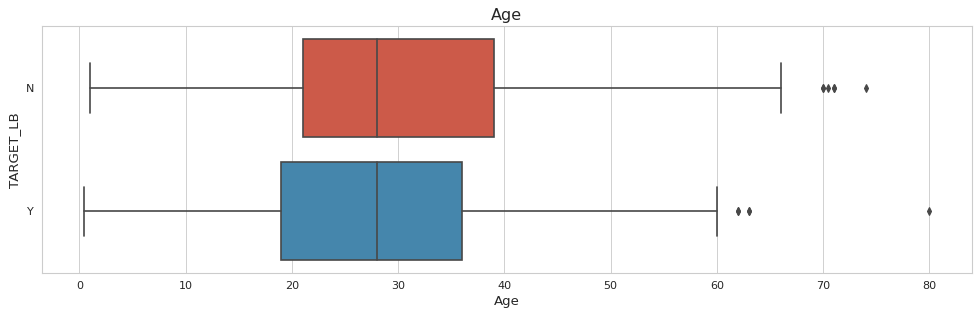

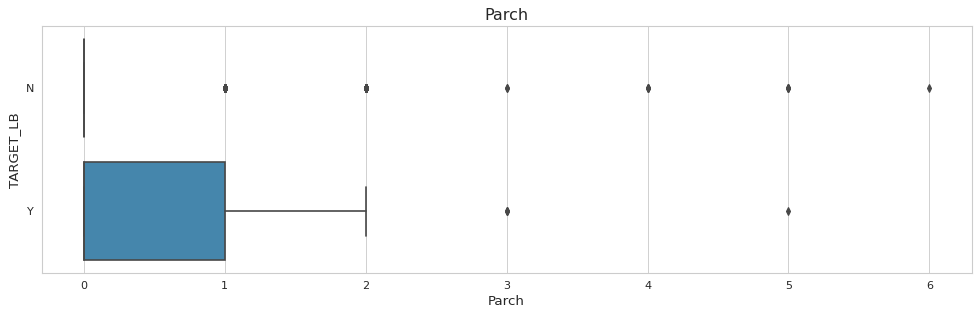

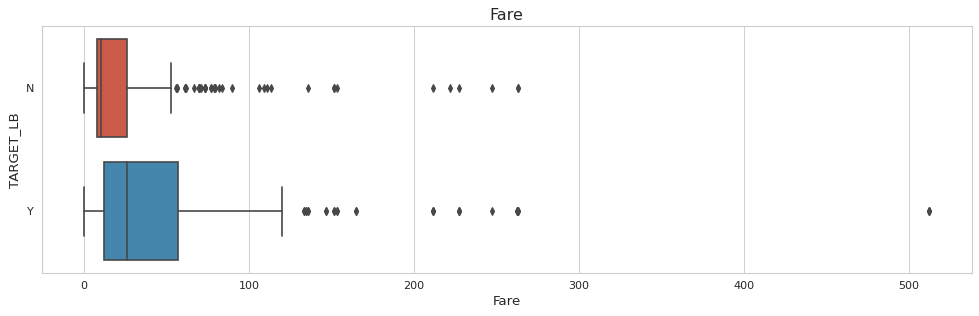

In [ ]:
# Grafico de cajas respecto al target
for x in columnsNumeric:
  plt.figure(figsize=(15,4), dpi=80)
  plt.title(df_prub[x].name)
  sns.boxplot(x=df_prub[x],y=df_prub['TARGET_LB'])
  plt.show()

## Analisis Multivariado

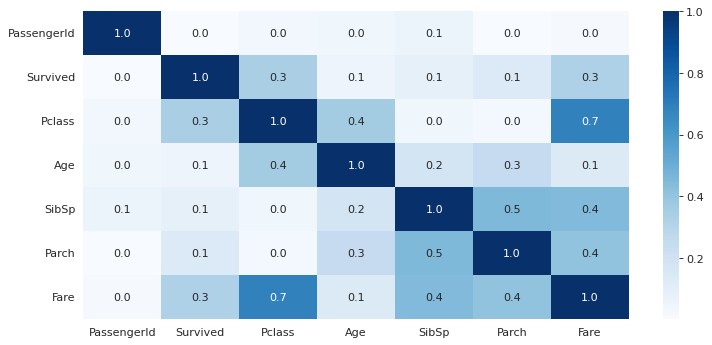

In [ ]:
# Analizamos la correlacion de las variables
# Spearman: Para variables numericas. No asume normalidad
plt.figure(figsize=(11,5), dpi=80)
sns.heatmap(abs(df.corr(method='spearman')),annot=True,fmt='.1f',cmap='Blues')
plt.show()

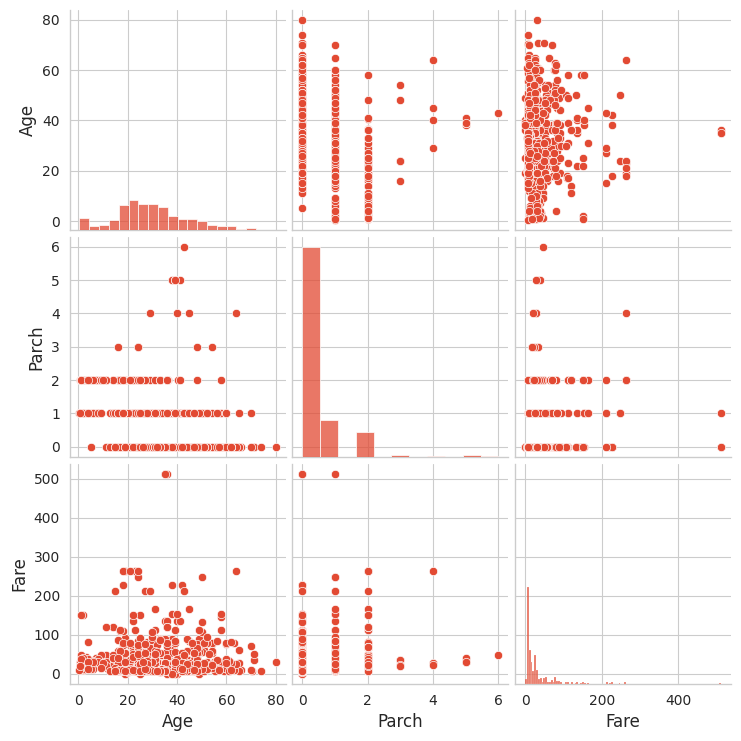

In [ ]:
sns.pairplot(df[columnsNumeric])

## Asimetria

Calculamos el Coeficiente de Asimetría

In [ ]:
from scipy import stats

In [ ]:
data_ca = {'Variable' : columnsNumeric,
       'Coeficiente_Asim' : stats.skew(df[columnsNumeric])}
asim = pd.DataFrame(data_ca)
asim

,Variable,Coeficiente_Asim
0,Age,NaN
1,Parch,2.744487
2,Fare,4.779253


## Tratamiento de Nulos

In [ ]:
df.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [ ]:
df.isnull().sum()/df.shape[0]*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

Se tienen valores perdidos, pero no es recomendable eliminar las variables Age ni Embarked ya que no representa el 20%; sin embargo, Cabin tiene demasiado nulo (77%), deberiamos eliminar esa variable

In [ ]:
df = df.drop(['Cabin','Name'],axis=1)
print(df.shape)
df.head(3)

(891, 10)


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S


In [ ]:
df_imp_1 = df.copy()
df_imp_2 = df.copy()

### Imputacion Univariada

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
#Imputacion Univariada Numerica
imp_univ_num = SimpleImputer(missing_values=np.nan,strategy='median')
#Iputacion univariada categorica
imp_univ_cat = SimpleImputer(missing_values=np.nan,strategy='most_frequent')

In [ ]:
# Generamos los subset de variables a imputar
data_imp_cat = df[columnsString]
data_imp_num = df[columnsNumeric]

In [ ]:
# Realizamos la imputacion univariada numerica
imp_univ_num.fit(data_imp_num)
imputed_data_univ_num = pd.DataFrame(data=imp_univ_num.transform(data_imp_num),
                                     columns=data_imp_num.columns,dtype='float')

# Realizamos la imputacion univariada categorica
imp_univ_cat.fit(data_imp_cat)
imputed_data_univ_cat = pd.DataFrame(data=imp_univ_cat.transform(data_imp_cat),
                                     columns=data_imp_cat.columns,dtype='object')

In [ ]:
# validamos la imputacion numerica
imputed_data_univ_num.isnull().sum()

Age      0
Parch    0
Fare     0
dtype: int64

In [ ]:
# validamos la imputacion categorica
imputed_data_univ_cat.isnull().sum()

Pclass      0
Sex         0
SibSp       0
Embarked    0
dtype: int64

In [ ]:
# Consolidamos el dataset
df = pd.concat([df['PassengerId'],imputed_data_univ_num,imputed_data_univ_cat,df['Survived']],axis=1)
print(df.shape)
df.head(3)

(891, 9)


,PassengerId,Age,Parch,Fare,Pclass,Sex,SibSp,Embarked,Survived
0,1,22.0,0.0,7.2500,3,male,1,S,0
1,2,38.0,0.0,71.2833,1,female,1,C,1
2,3,26.0,0.0,7.9250,3,female,0,S,1


In [ ]:
df.isnull().sum().sort_values(ascending=False)

PassengerId    0
Age            0
Parch          0
Fare           0
Pclass         0
Sex            0
SibSp          0
Embarked       0
Survived       0
dtype: int64

## Deteccion Outliers

<Axes: title={'center': 'Histogram of the age variable'}, ylabel='Frequency'>

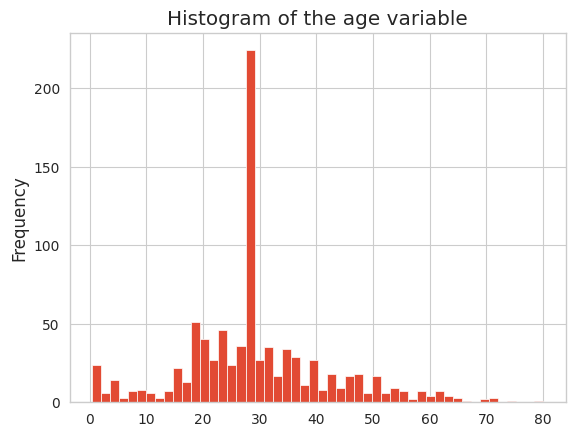

In [ ]:
# A través de histogramas
df['Age'].plot.hist(bins = 50,title = "Histogram of the age variable")

In [ ]:
df["Age"].describe()

count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

<Axes: xlabel='Age', ylabel='Density'>

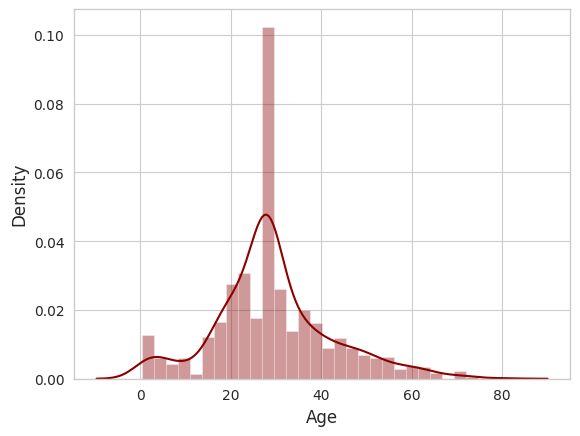

In [ ]:
sns.distplot(df['Age'],kde=True,color='darkred',bins=30)

### Z-score

Si el Z-score es menor que 2.5 o más grande que 2.5 el valor esta en el 5% de los más grandes o más pequeños.

z = (x – μ) / σ

In [ ]:
from scipy.stats import zscore

In [ ]:
train = df.dropna()
train["age_zscore"] = zscore(train["Age"])
train["is_outlier"] = np.where((train["age_zscore"] <= -3.5) | (train["age_zscore"] >= 3.5), True, False)
train[train["is_outlier"]]

,PassengerId,Age,Parch,Fare,Pclass,Sex,SibSp,Embarked,Survived,age_zscore,is_outlier
630,631,80.0,0.0,30.0,1,male,0,S,1,3.891554,True


In [ ]:
train["age_zscore"].describe()

count    8.910000e+02
mean     2.272780e-16
std      1.000562e+00
min     -2.224156e+00
25%     -5.657365e-01
50%     -1.046374e-01
75%      4.333115e-01
max      3.891554e+00
Name: age_zscore, dtype: float64

### DBSCAN
Density-Based Spatial Clustering of Application with Noise

<Axes: xlabel='Age', ylabel='Fare'>

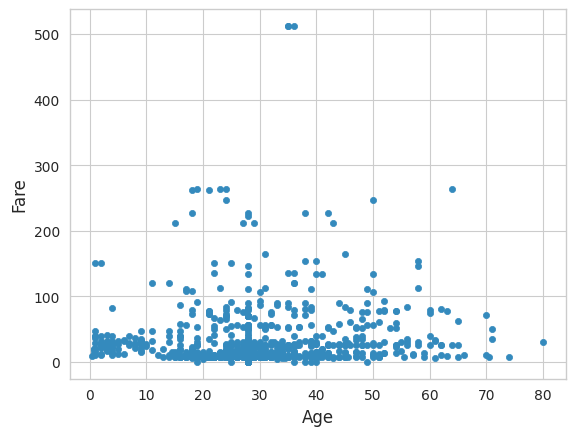

In [ ]:
ageAndFare = df[["Age", "Fare"]]
ageAndFare.plot.scatter(x = "Age", y = "Fare")

In [ ]:
from sklearn.preprocessing import MinMaxScaler

<Axes: xlabel='Age', ylabel='Fare'>

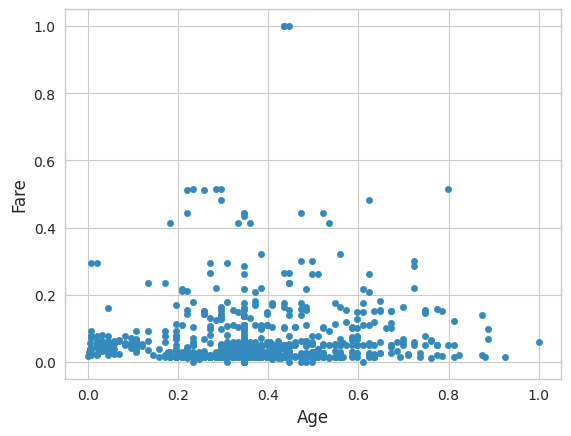

In [ ]:
scaler = MinMaxScaler()
scaler.fit(ageAndFare)
ageAndFare = scaler.transform(ageAndFare)

ageAndFare = pd.DataFrame(ageAndFare, columns = ["Age", "Fare"])
ageAndFare.plot.scatter(x = "Age", y = "Fare")

Ahora las dos variables ya se encuentran a la misma escala y misma unidad de medida

Distancia Euclideana

d=√((x_2 - x_1)² + (y_2 - y_1)²)

Para que las distancias entre los puntos sea iguales, se debe utilizar el plano cartesiano con 3 planos

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
outlier_detection = DBSCAN(
  eps = 0.05,            #Distancia maxima para considerarse como vecinos
  metric="euclidean",    # Distancia Eucliniana (utiliza los 3 planos)
  min_samples = 3,   #Minimo de registros en el radio para ser considerado cluster
  n_jobs = -1)       # -1: utiliza todos los recursos del computador,  1: solo utiliza 1 procesador

clusters = outlier_detection.fit_predict(ageAndFare)    # aprende y transforma (predice)

ageAndFare['cluster'] = clusters
ageAndFare.head(4)

,Age,Fare,cluster
0,0.271174,0.014151,0
1,0.472229,0.139136,0
2,0.321438,0.015469,0
3,0.434531,0.103644,0


In [ ]:
ageAndFare['cluster'].value_counts()

 0    851
-1     16
 1      6
 2      6
 4      5
 5      4
 3      3
Name: cluster, dtype: int64

In [ ]:
from matplotlib import cm

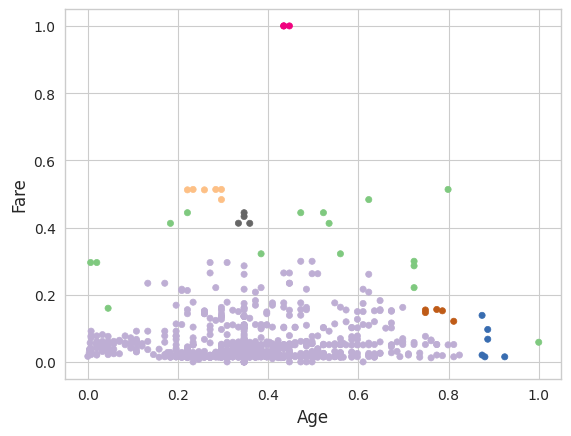

In [ ]:
cmap = cm.get_cmap('Accent')
ageAndFare.plot.scatter(
  x = "Age",
  y = "Fare",
  c = clusters,
  cmap = cmap,
  colorbar = False
);

* En la primera ejecucion (eps=1, min_samples=10) observamos que todo lo coloco como un unico cluster
* En la segunda ejecucion (eps=0.2, min_samples=5) observamos que ha detectado los outliers (-1). Estos podrian ser eliminados pq son valores extremos
* En la tercera ejecucion (eps=0.05, min_samples=3) observamos que ya ha detectado mas de un cluster

# **II. Recodificacion Data**

In [ ]:
ColumnsCategoricas = ['Sex','Embarked']
ColumnsRest = [x for x in df.columns if x not in ColumnsCategoricas + target]
df_categoricas_02 = df[ColumnsCategoricas]

## OneHotEncoder

In [ ]:
# Preprocesamiento con OneHotEncoder
df_categoricas_03 = pd.get_dummies(df_categoricas_02)

In [ ]:
print(df_categoricas_03.shape)
df_categoricas_03.head(3)

(891, 5)


,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,1,0,0,1
1,1,0,1,0,0
2,1,0,0,0,1


In [ ]:
# Eliminamos variables repetidas
df_categoricas_03 = df_categoricas_03.drop(['Sex_female','Embarked_C'],axis=1)

In [ ]:
ColumnsRest

['PassengerId', 'Age', 'Parch', 'Fare', 'Pclass', 'SibSp']

In [ ]:
df2 = pd.concat([df[ColumnsRest],df_categoricas_03,df.Survived],axis=1)
print(df2.shape)
df2.head(3)

(891, 10)


,PassengerId,Age,Parch,Fare,Pclass,SibSp,Sex_male,Embarked_Q,Embarked_S,Survived
0,1,22.0,0.0,7.2500,3,1,1,0,1,0
1,2,38.0,0.0,71.2833,1,1,0,0,0,1
2,3,26.0,0.0,7.9250,3,0,0,0,1,1


## Estandarizacion

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
predictors = [var for var in df2 if var not in ['PassengerId', 'Survived']]

In [ ]:
scaler = MinMaxScaler()
df3 = pd.DataFrame(scaler.fit_transform(df2[predictors]), columns = predictors)
df3 = pd.concat([df2['PassengerId'],df3,df2.Survived],axis=1)
print(df2.shape)
df3.head(4)

(891, 10)


,PassengerId,Age,Parch,Fare,Pclass,SibSp,Sex_male,Embarked_Q,Embarked_S,Survived
0,1,0.271174,0.0,0.014151,1.0,0.125,1.0,0.0,1.0,0
1,2,0.472229,0.0,0.139136,0.0,0.125,0.0,0.0,0.0,1
2,3,0.321438,0.0,0.015469,1.0,0.000,0.0,0.0,1.0,1
3,4,0.434531,0.0,0.103644,0.0,0.125,0.0,0.0,1.0,1


# **III. Tratamiento de Nulos**

In [ ]:
df_imp_2 = df3.copy()

### Imputacion KNN
Este algoritmo ayuda a inputar nulos por valores cercanos; sin embargo, las variables deben ser numericas y estar normalizadas

In [ ]:
from sklearn.impute import KNNImputer

In [ ]:
imputer = KNNImputer(n_neighbors=5)
df_impv2 = pd.DataFrame(imputer.fit_transform(df_imp_2),columns = df_imp_2.columns)
print(df_impv2.shape)
df_impv2.head(3)

(891, 10)


,PassengerId,Age,Parch,Fare,Pclass,SibSp,Sex_male,Embarked_Q,Embarked_S,Survived
0,1.0,0.271174,0.0,0.014151,1.0,0.125,1.0,0.0,1.0,0.0
1,2.0,0.472229,0.0,0.139136,0.0,0.125,0.0,0.0,0.0,1.0
2,3.0,0.321438,0.0,0.015469,1.0,0.000,0.0,0.0,1.0,1.0


In [ ]:
df_impv2.isnull().sum().sort_values(ascending=False)

PassengerId    0
Age            0
Parch          0
Fare           0
Pclass         0
SibSp          0
Sex_male       0
Embarked_Q     0
Embarked_S     0
Survived       0
dtype: int64

# **IV. Modelado**

In [ ]:
df_modelo = df_impv2.copy()

## Particion Muestral

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_modelo.drop(['Survived','PassengerId'],axis=1),
                                                    df_modelo['Survived'], test_size=0.20,
                                                    random_state=101,stratify=df_modelo['Survived'])

In [ ]:
print('X_train shape', X_train.shape)
print('y_train shape', y_train.shape)
print('X_test shape', X_test.shape)
print('y_test shape', y_test.shape)

X_train shape (712, 8)
y_train shape (712,)
X_test shape (179, 8)
y_test shape (179,)


## Regresion Logistica

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [ ]:
logmodel.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [ ]:
y_pred_train = logmodel.predict(X_train)
y_pred_test = logmodel.predict(X_test)
y_pred__proba_test = logmodel.predict_proba(X_test)

In [ ]:
from sklearn import metrics as metrics

In [ ]:
# Paso N°03: Revisamos las metricas de validacion técnicas adecuadas!

# Matriz de confusion
print("Matriz confusion: Train")
cm_train = metrics.confusion_matrix(y_train,y_pred_train)
print(cm_train)

print("Matriz confusion: Test")
cm_test = metrics.confusion_matrix(y_test,y_pred_test)
print(cm_test)

# Accuracy
print("Accuracy: Train")
accuracy_train=metrics.accuracy_score(y_train,y_pred_train)
print(accuracy_train)

print("Accuracy: Test")
accuracy_test=metrics.accuracy_score(y_test,y_pred_test)
print(accuracy_test)

# Precision o Aporte del Modelo
print("Precision: Train")
precision_train=metrics.precision_score(y_train,y_pred_train)
print(precision_train)

print("Precision: Test")
precision_test=metrics.precision_score(y_test,y_pred_test)
print(precision_test)

# Recall o Sensibilidad
print("Recall: Train")
recall_train=metrics.recall_score(y_train,y_pred_train)
print(recall_train)

print("Recall: Test")
recall_test=metrics.recall_score(y_test,y_pred_test)
print(recall_test)

Matriz confusion: Train
[[380  59]
 [ 75 198]]
Matriz confusion: Test
[[99 11]
 [32 37]]
Accuracy: Train
0.8117977528089888
Accuracy: Test
0.7597765363128491
Precision: Train
0.7704280155642024
Precision: Test
0.7708333333333334
Recall: Train
0.7252747252747253
Recall: Test
0.5362318840579711


In [ ]:
y_pred_test

array([0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
       1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0.,
       0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0.,
       0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1.,
       1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 0., 1., 0., 1., 0., 0., 0., 1.])

In [ ]:
y_pred__proba_test[:5]

array([[0.86563034, 0.13436966],
       [0.53003763, 0.46996237],
       [0.46221219, 0.53778781],
       [0.91008413, 0.08991587],
       [0.89573017, 0.10426983]])

In [ ]:
logmodel.coef_

array([[-2.02171798, -0.39891246,  0.50011052, -2.05443259, -1.05564836,
        -2.64355564,  0.27127657, -0.1640257 ]])

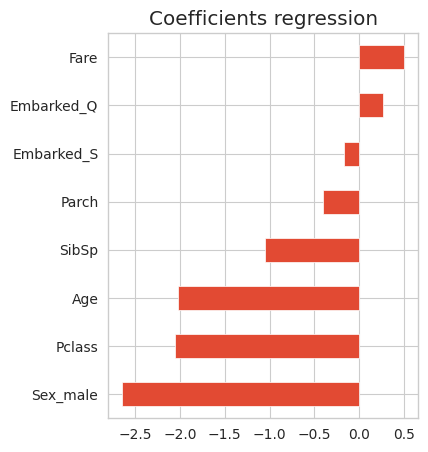

In [ ]:
# Importancia
coef = pd.Series(logmodel.coef_[0],index=predictors)

imp_coef = pd.concat([coef.sort_values()])
plt.rcParams['figure.figsize'] = (4.0,5.0)
imp_coef.plot(kind='barh')
plt.title('Coefficients regression')

var_impor = imp_coef.index
var_impor = list(var_impor)

In [ ]:
print(metrics.classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

         0.0       0.76      0.90      0.82       110
         1.0       0.77      0.54      0.63        69

    accuracy                           0.76       179
   macro avg       0.76      0.72      0.73       179
weighted avg       0.76      0.76      0.75       179



El 75% de mis predicciones han diso orrectas (accuracy)

accuracy = (96+38)/(96+14+31+38)

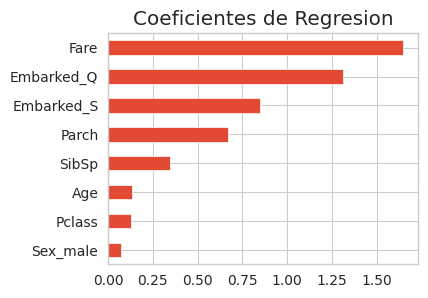

In [ ]:
coef = pd.Series(logmodel.coef_[0],index=predictors)
coef = np.exp(coef)

imp_coef = pd.concat([coef.sort_values()])
plt.rcParams['figure.figsize'] = (4.0,3.0)
imp_coef.plot(kind='barh')
plt.title('Coeficientes de Regresion')

var_impor = imp_coef.index
var_impor = list(var_impor)

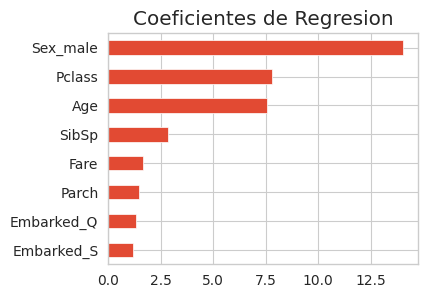

In [ ]:
coef = np.where(coef<1,1/coef,coef)
coef = pd.Series(coef,index=predictors)


imp_coef = pd.concat([coef.sort_values()])
plt.rcParams['figure.figsize'] = (4.0,3.0)
imp_coef.plot(kind='barh')
plt.title('Coeficientes de Regresion')

var_impor = imp_coef.index
var_impor = list(var_impor)

* Viendo las inversa, el sexo es la variable mas importante de esta regresion

## Decision Tree Classifiction

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
dt_model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [ ]:
y_pred_train = dt_model.predict(X_train)
y_pred_test = dt_model.predict(X_test)

In [ ]:
# Paso N°03: Revisamos las metricas de validacion técnicas adecuadas!

# Matriz de confusion
print("Matriz confusion: Train")
cm_train = metrics.confusion_matrix(y_train,y_pred_train)
print(cm_train)

print("Matriz confusion: Test")
cm_test = metrics.confusion_matrix(y_test,y_pred_test)
print(cm_test)

# Accuracy
print("Accuracy: Train")
accuracy_train=metrics.accuracy_score(y_train,y_pred_train)
print(accuracy_train)

print("Accuracy: Test")
accuracy_test=metrics.accuracy_score(y_test,y_pred_test)
print(accuracy_test)

# Precision o Aporte del Modelo
print("Precision: Train")
precision_train=metrics.precision_score(y_train,y_pred_train)
print(precision_train)

print("Precision: Test")
precision_test=metrics.precision_score(y_test,y_pred_test)
print(precision_test)

# Recall o Sensibilidad
print("Recall: Train")
recall_train=metrics.recall_score(y_train,y_pred_train)
print(recall_train)

print("Recall: Test")
recall_test=metrics.recall_score(y_test,y_pred_test)
print(recall_test)

Matriz confusion: Train
[[437   2]
 [  9 264]]
Matriz confusion: Test
[[92 18]
 [28 41]]
Accuracy: Train
0.9845505617977528
Accuracy: Test
0.7430167597765364
Precision: Train
0.9924812030075187
Precision: Test
0.6949152542372882
Recall: Train
0.967032967032967
Recall: Test
0.5942028985507246


In [ ]:
#Importancia de variables
dt_model.feature_importances_

array([0.2229086 , 0.03382889, 0.23741885, 0.08340953, 0.05294502,
       0.33809043, 0.00721158, 0.0241871 ])

In [ ]:
pd.Series(data=dt_model.feature_importances_, index=X_train.columns)

Age           0.222909
Parch         0.033829
Fare          0.237419
Pclass        0.083410
SibSp         0.052945
Sex_male      0.338090
Embarked_Q    0.007212
Embarked_S    0.024187
dtype: float64

In [ ]:
print(metrics.classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

         0.0       0.77      0.84      0.80       110
         1.0       0.69      0.59      0.64        69

    accuracy                           0.74       179
   macro avg       0.73      0.72      0.72       179
weighted avg       0.74      0.74      0.74       179



* El 73% de mis predicciones han sido correctas (accuracy)
* accuracy = (89+42)/(89+21+27+42)

In [ ]:
from graphviz import Source
from sklearn.tree import export_graphviz
from IPython.display import SVG

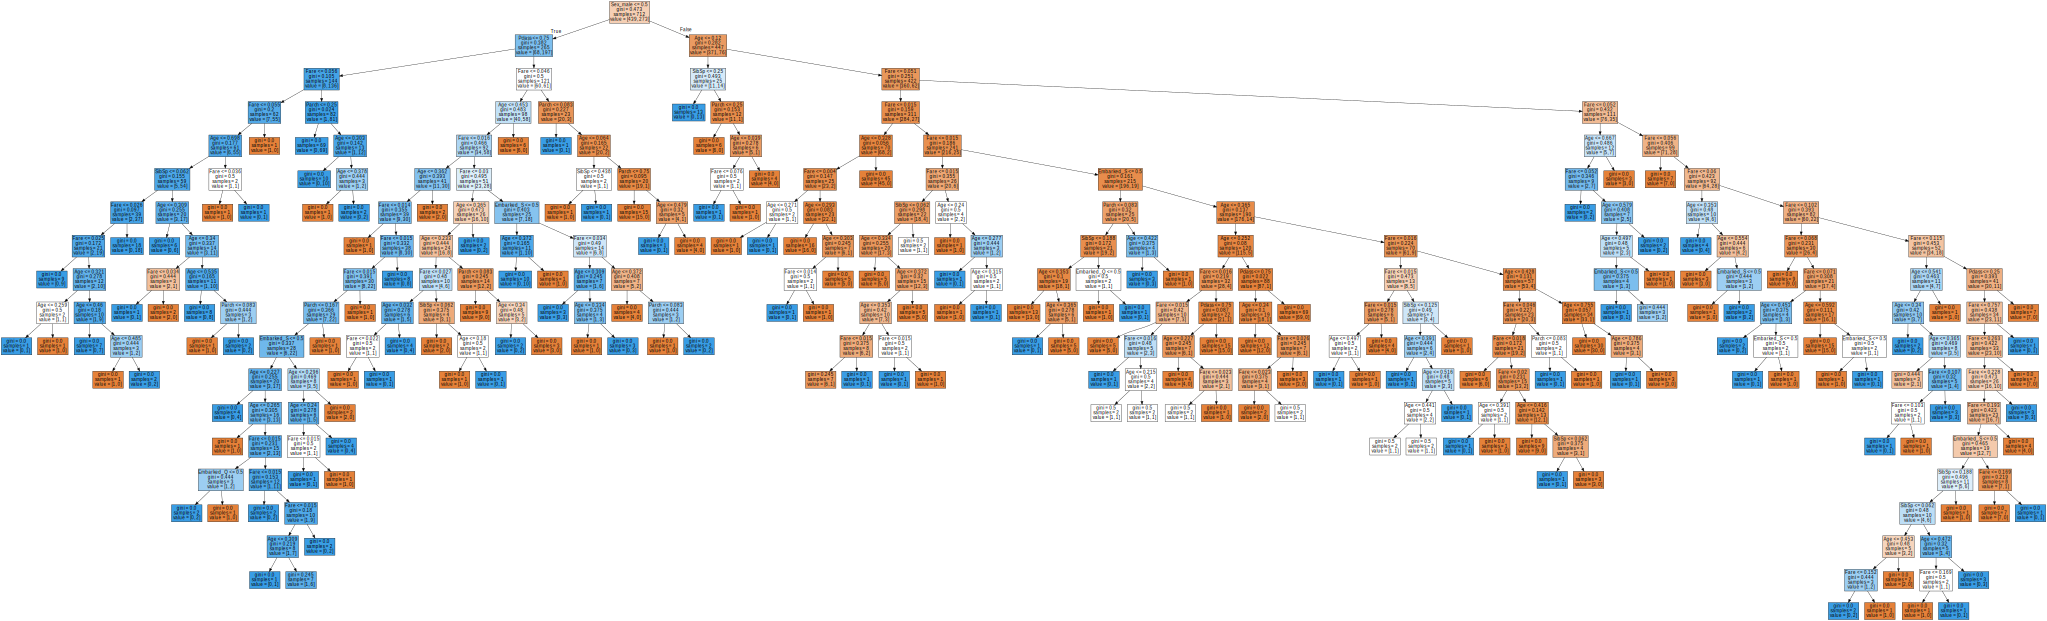

In [ ]:
graph = Source(export_graphviz(dt_model, feature_names=X_train.columns, filled=True))
SVG(graph.pipe(format='svg'))

## Random Forest Classification

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf= RandomForestClassifier(n_estimators=5)
rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=5)

In [ ]:
y_pred_train=rf.predict(X_train)
y_pred_test=rf.predict(X_test)

In [ ]:
# Paso N°03: Revisamos las metricas de validacion técnicas adecuadas!

# Matriz de confusion
print("Matriz confusion: Train")
cm_train = metrics.confusion_matrix(y_train,y_pred_train)
print(cm_train)

print("Matriz confusion: Test")
cm_test = metrics.confusion_matrix(y_test,y_pred_test)
print(cm_test)

# Accuracy
print("Accuracy: Train")
accuracy_train=metrics.accuracy_score(y_train,y_pred_train)
print(accuracy_train)

print("Accuracy: Test")
accuracy_test=metrics.accuracy_score(y_test,y_pred_test)
print(accuracy_test)

# Precision o Aporte del Modelo
print("Precision: Train")
precision_train=metrics.precision_score(y_train,y_pred_train)
print(precision_train)

print("Precision: Test")
precision_test=metrics.precision_score(y_test,y_pred_test)
print(precision_test)

# Recall o Sensibilidad
print("Recall: Train")
recall_train=metrics.recall_score(y_train,y_pred_train)
print(recall_train)

print("Recall: Test")
recall_test=metrics.recall_score(y_test,y_pred_test)
print(recall_test)

Matriz confusion: Train
[[431   8]
 [ 13 260]]
Matriz confusion: Test
[[90 20]
 [30 39]]
Accuracy: Train
0.9705056179775281
Accuracy: Test
0.7206703910614525
Precision: Train
0.9701492537313433
Precision: Test
0.6610169491525424
Recall: Train
0.9523809523809523
Recall: Test
0.5652173913043478


In [ ]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 5,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
print(metrics.classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

         0.0       0.75      0.82      0.78       110
         1.0       0.66      0.57      0.61        69

    accuracy                           0.72       179
   macro avg       0.71      0.69      0.70       179
weighted avg       0.72      0.72      0.72       179



* El 74% de mis predicciones han sido correctas (accuracy)
* accuracy = (95+41)/(95+15+28+41)

# Varios Algoritmos

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB

In [ ]:
clf_rf = RandomForestClassifier()
clf_et = ExtraTreesClassifier()
clf_bc = BaggingClassifier()
clf_ada = AdaBoostClassifier()
clf_dt = DecisionTreeClassifier()
clf_lr= LogisticRegression()
clf_svm = SVC()
clf_mnb = MultinomialNB()
clf_gnb = GaussianNB()

In [ ]:
Classifiers = ['RandomForest','ExtraTrees','Bagging','AdaBoost','DecisionTree','LogisticRegression','SVM','MultiNB','GaussianNB']

scores_mean = []
scores_sd = []
models = [clf_rf,clf_et,clf_bc,clf_ada,clf_dt,clf_lr,clf_svm,clf_mnb,clf_gnb]

for model in models:
  scores = cross_val_score(model,X_train,y_train,scoring = 'accuracy', cv=10,n_jobs=-10)
  mean_scores = scores.mean()
  sd_scores = scores.std()
  scores_mean.append(mean_scores)
  scores_sd.append(sd_scores)

In [ ]:
mode = pd.DataFrame(scores_mean,index=Classifiers,columns=['score']).sort_values(by='score',ascending=False)
mode['std'] = scores_sd
mode

,score,std
SVM,0.824531,0.066508
RandomForest,0.814515,0.051741
ExtraTrees,0.813146,0.054128
Bagging,0.810309,0.059164
LogisticRegression,0.806299,0.066447
AdaBoost,0.803423,0.046323
GaussianNB,0.796420,0.045515
DecisionTree,0.769621,0.022278
MultiNB,0.671322,0.047986
